In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df_train_raw = pd.read_csv('./datasets/train.csv')

df = df_train_raw.copy()

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# I'm going to quickly do a correlation visualization

In [6]:
def fancy_heatmap(df):
    '''
    Creates a much more organized looking heatmap
    This script was created by someone online and shared in my dsir-824 class
    I did not make this, but i am implementing it here
    '''
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(20, 10))
    sns.heatmap(
        df.corr(),
        cmap='coolwarm',
        annot=True,
        mask = mask
)

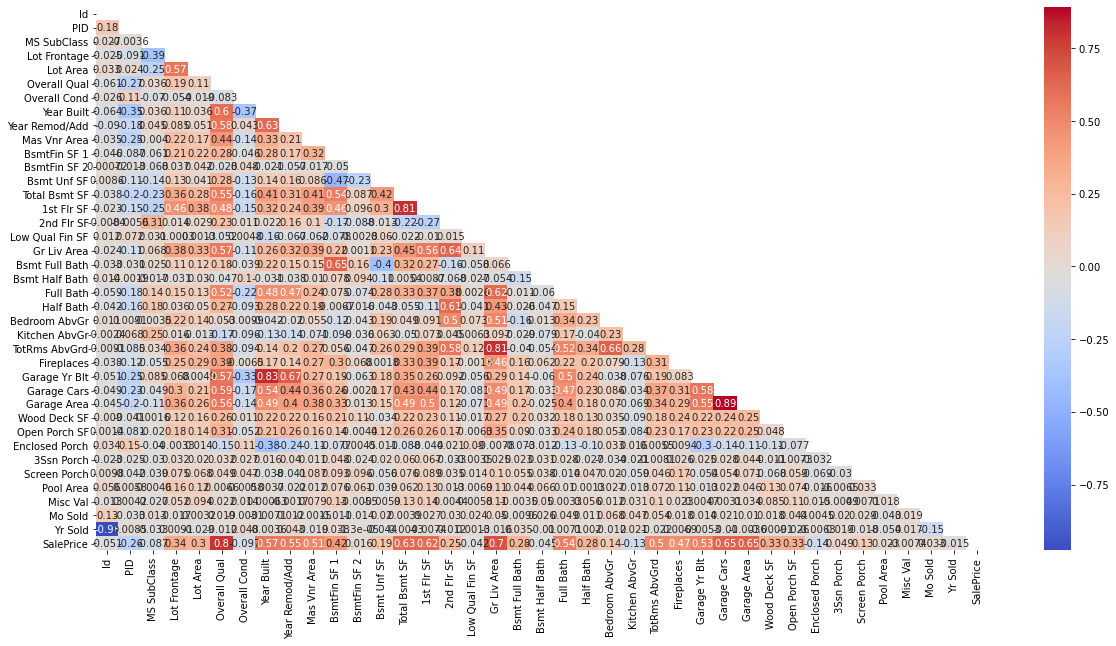

In [7]:
fancy_heatmap(df)

In [8]:
pd.Series(df.corr()['SalePrice']).sort_values(ascending=False).head(15)

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Name: SalePrice, dtype: float64

In [9]:
# According to my correlation exploratory data analysis, I should focus on these factors, the rest don't seem to matter

In [10]:
df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [11]:
list(df.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

In [12]:
# First Experiment using data columns that don't have nulls

In [13]:
X = df[['Overall Qual']]

In [14]:
y = df['SalePrice']

In [15]:
X.head()

,Overall Qual
0,6
1,7
2,5
3,5
4,6


In [16]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [17]:
# Setting up a basic linear model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_test, y_test)

0.6523587985800512

In [22]:
# Linear Regression is bad

In [23]:
logr = LogisticRegression(n_jobs=-1)

In [24]:
logr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [25]:
logr.score(X_test, y_test)

0.015594541910331383

In [26]:
# Logistic Regression is just as bad, let's try a ton of variables

In [27]:
df_dummies = pd.get_dummies(df)

In [28]:
df_dummies.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
a = pd.Series(df_dummies.corr()['SalePrice']).sort_values(ascending=False) > 0.5

In [30]:
# Assigning all variables with a correlation above 0.5 as our X

In [31]:
df_dummies = df_dummies.loc[:, a].dropna()

In [32]:
X = df_dummies.drop('SalePrice', axis=1)

In [33]:
y = df_dummies['SalePrice']

In [46]:
ss = StandardScaler()

In [48]:
X_sc = ss.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
logr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [51]:
logr.score(X_test, y_test)

0.010438413361169102

In [53]:
pipe = make_pipeline(StandardScaler, KNeighborsRegressor)

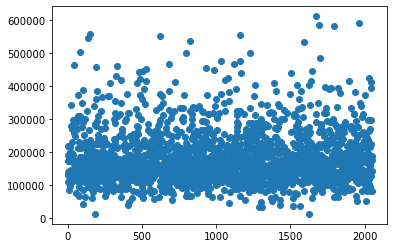

In [55]:
plt.plot(df['SalePrice'], 'o')

In [65]:
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Id',
       'Kitchen AbvGr', 'Kitchen Qual', 'Land Contour', 'Land Slope',
       'Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape',
       'Low Qual Fin SF', 'MS SubClass', 'MS Zoning', 'Mas Vnr Area',
       'Mas Vnr Type', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Neighborhood',
       

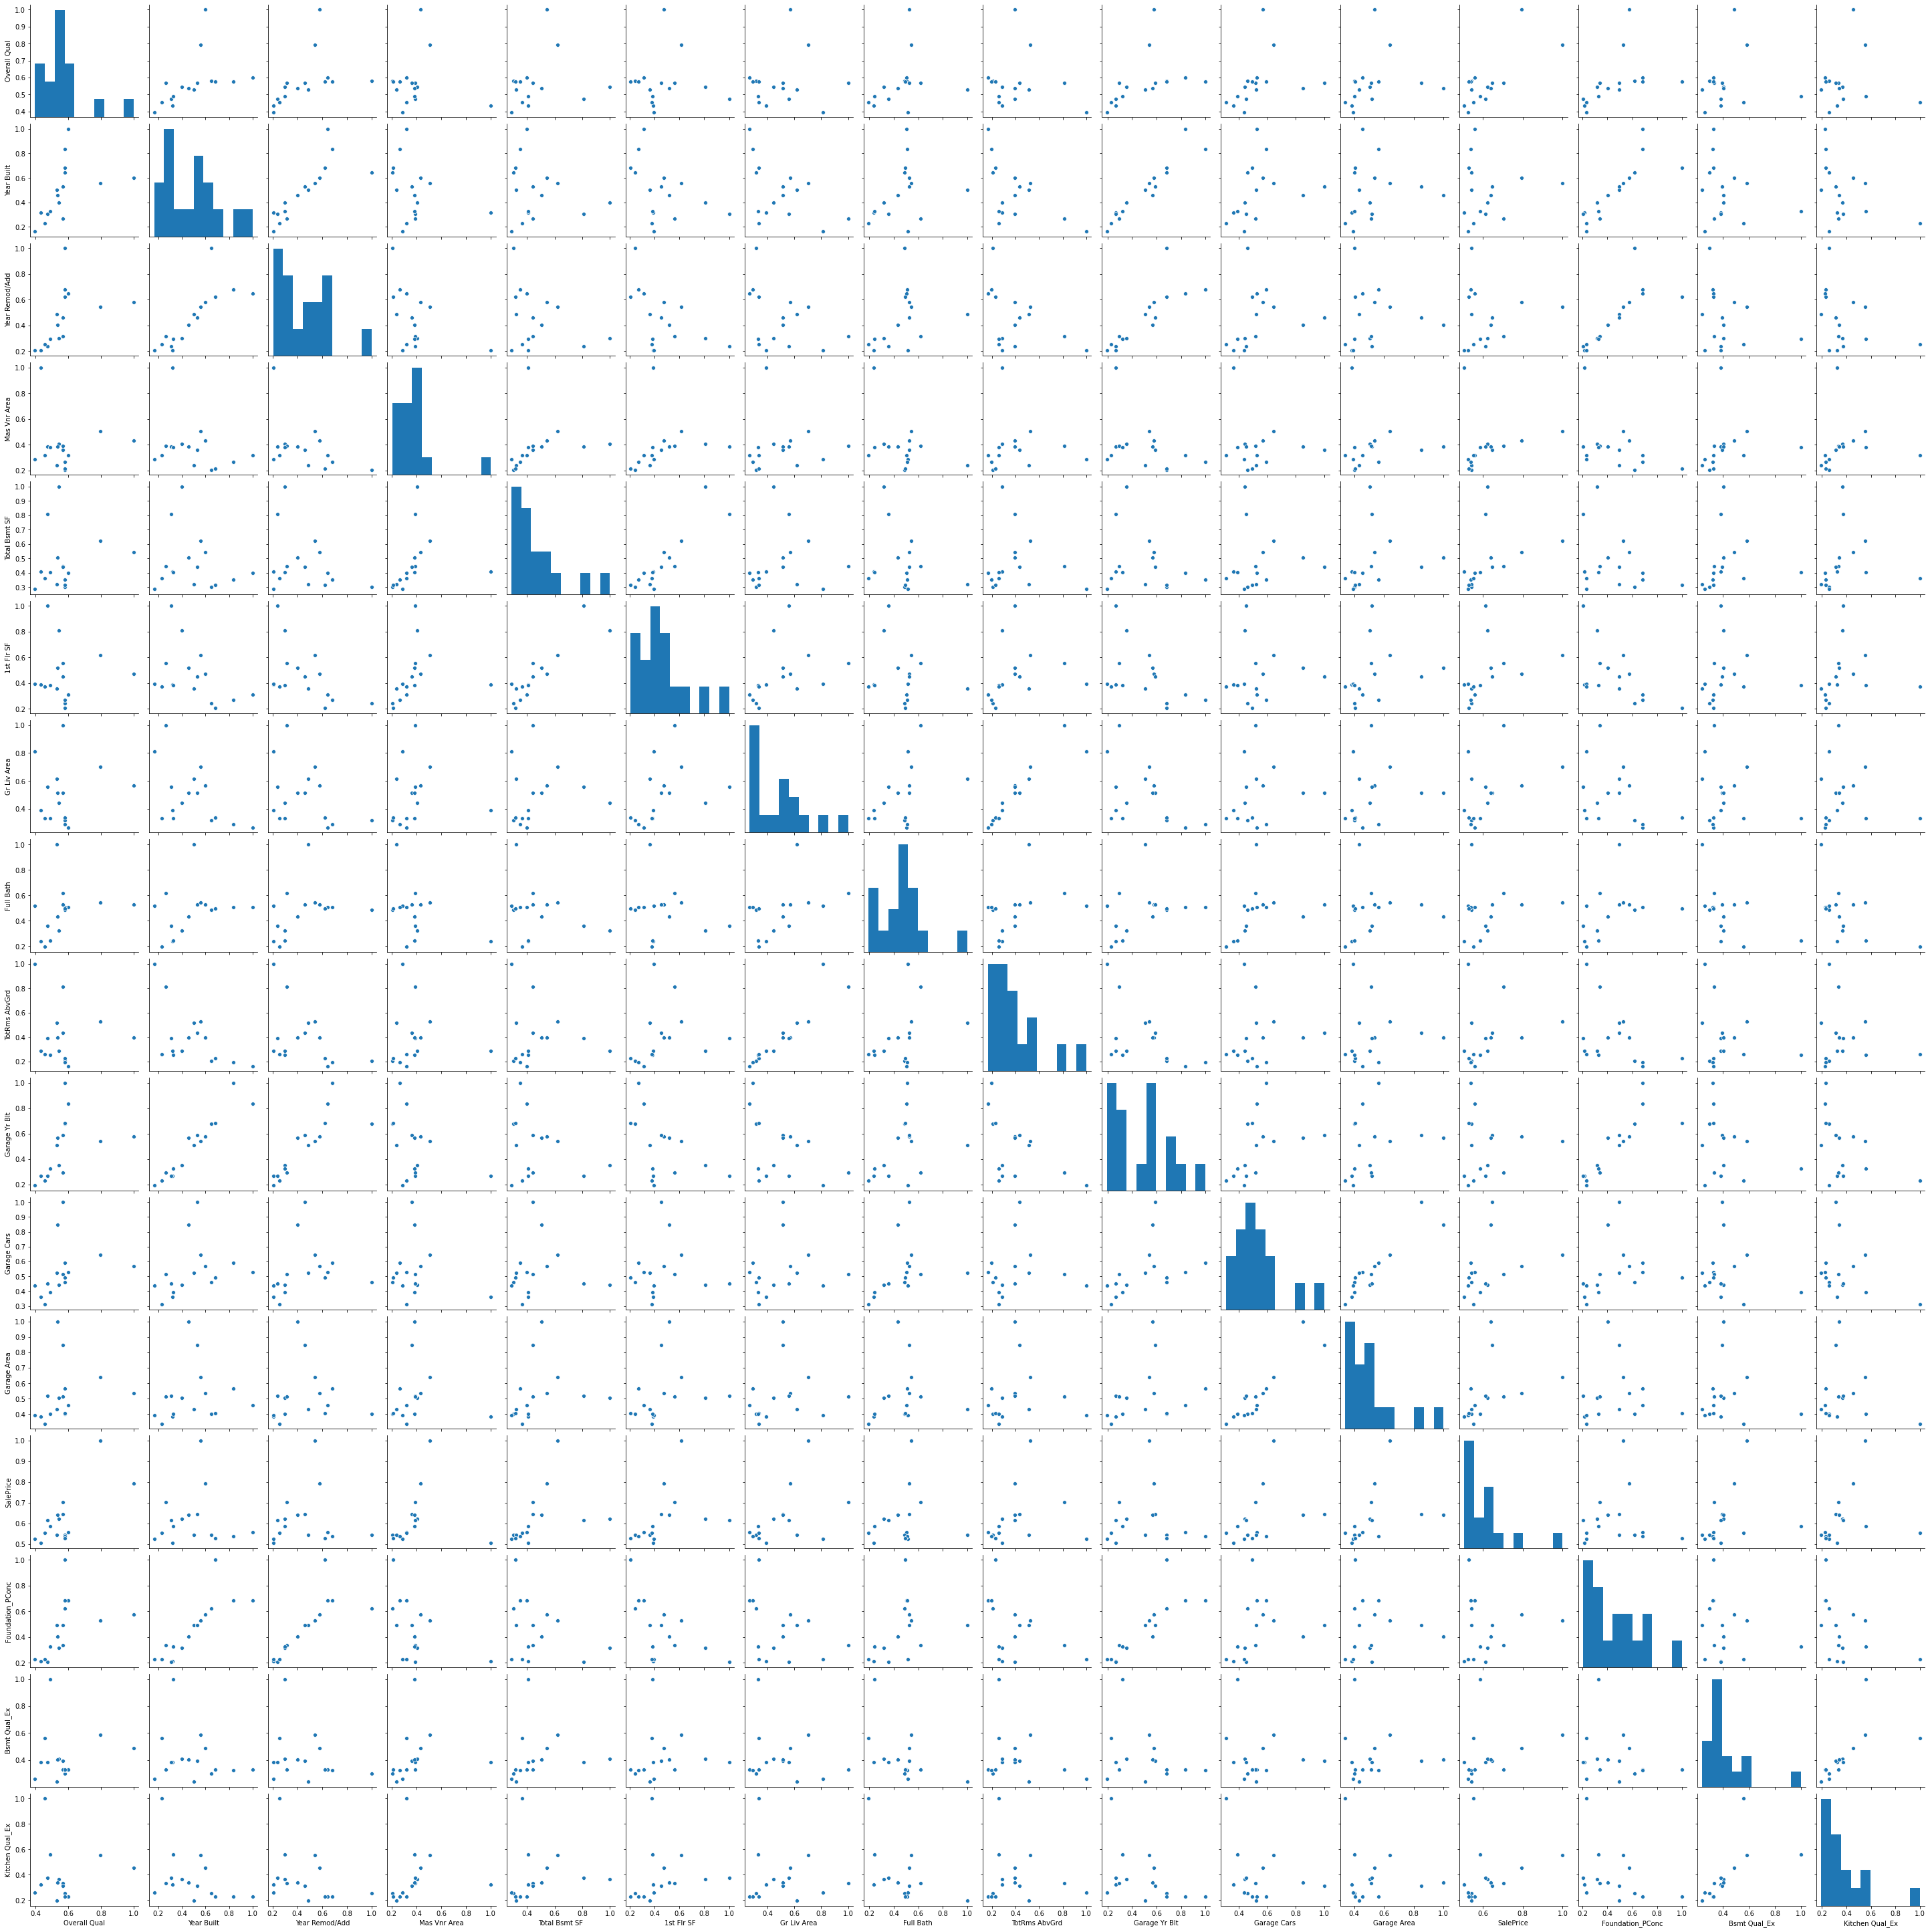

In [64]:
sns.pairplot(df_dummies.corr())
plt.savefig('pairplot.png')

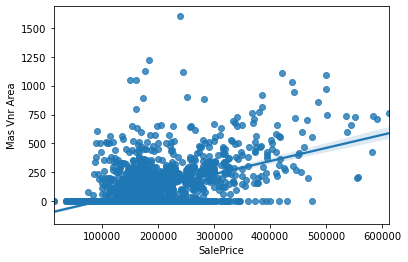

In [66]:
sns.regplot(df['SalePrice'], df['Mas Vnr Area'])

In [67]:
df['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

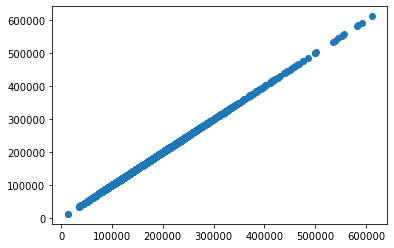

In [68]:
plt.scatter(df['SalePrice'], df['SalePrice'])

In [69]:
knn = KNeighborsRegressor()

In [70]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [71]:
knn.score(X_test, y_test)

0.6551758438673615

In [ ]:
knn